# Linear Regression Using Sequential
This does Linear Regression on the Fish Market dataset using tf.keras.Sequential

In [7]:
# Import the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the dataset from a CSV file
df = pd.read_csv('../../../../../Machine-Learning/zData/Fish-Market/Fish.csv')

# Get Max Weight for Scaling Later
weightMax = df['Weight'].max()

# Scale Data to 0-1 Floats
# https://datagy.io/pandas-normalize-column/
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df.iloc[:, 1:])
scaled = min_max_scaler.fit_transform(df.iloc[:, 1:])
df_norm = pd.DataFrame(scaled, columns=df.iloc[:, 1:].columns)

# Split the dataset into training and test sets with a 80/20 split
train_df, test_df = train_test_split(df_norm, test_size=0.2)

In [8]:
print(train_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']])
print(train_df['Weight'])

      Length1   Length2   Length3    Height     Width
151  0.073786  0.061818  0.072635  0.028180  0.033294
72   0.000000  0.000000  0.000000  0.022265  0.050801
82   0.223301  0.229091  0.231419  0.230088  0.353434
73   0.097087  0.096364  0.099662  0.104454  0.134134
106  0.357282  0.356364  0.347973  0.353598  0.444942
..        ...       ...       ...       ...       ...
96   0.281553  0.283636  0.282095  0.322986  0.377114
153  0.075728  0.065455  0.074324  0.027628  0.014208
29   0.504854  0.520000  0.570946  1.000000  0.783068
59   0.508738  0.509091  0.520270  0.582334  0.778924
40   0.223301  0.220000  0.236486  0.275519  0.324763

[127 rows x 5 columns]
151    0.006061
72     0.003576
82     0.066667
73     0.019394
106    0.151515
         ...   
96     0.136364
153    0.005939
29     0.606061
59     0.484848
40     0.000000
Name: Weight, Length: 127, dtype: float64


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='MSE')

history = model.fit(
    np.array(train_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]),
    np.array(train_df['Weight']),
    epochs=10,
    verbose=2,
    validation_split=0.1
)

Epoch 1/10
4/4 - 0s - loss: 0.0145 - val_loss: 0.0163 - 293ms/epoch - 73ms/step
Epoch 2/10
4/4 - 0s - loss: 0.0141 - val_loss: 0.0160 - 24ms/epoch - 6ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0138 - val_loss: 0.0157 - 25ms/epoch - 6ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0136 - val_loss: 0.0154 - 28ms/epoch - 7ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0133 - val_loss: 0.0152 - 26ms/epoch - 6ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0130 - val_loss: 0.0149 - 28ms/epoch - 7ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0128 - val_loss: 0.0147 - 24ms/epoch - 6ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0126 - val_loss: 0.0145 - 23ms/epoch - 6ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0123 - val_loss: 0.0143 - 28ms/epoch - 7ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0121 - val_loss: 0.0141 - 26ms/epoch - 6ms/step


In [10]:
# Sort for Plot
sorted_df = test_df.sort_values('Weight')
evalError = model.evaluate(
    np.array(sorted_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]),
    np.array(sorted_df['Weight'])
)
print(evalError)
print(evalError * weightMax)

1/1 [==============================] - 0s 56ms/step - loss: 0.0087
0.008662249892950058
14.292712323367596


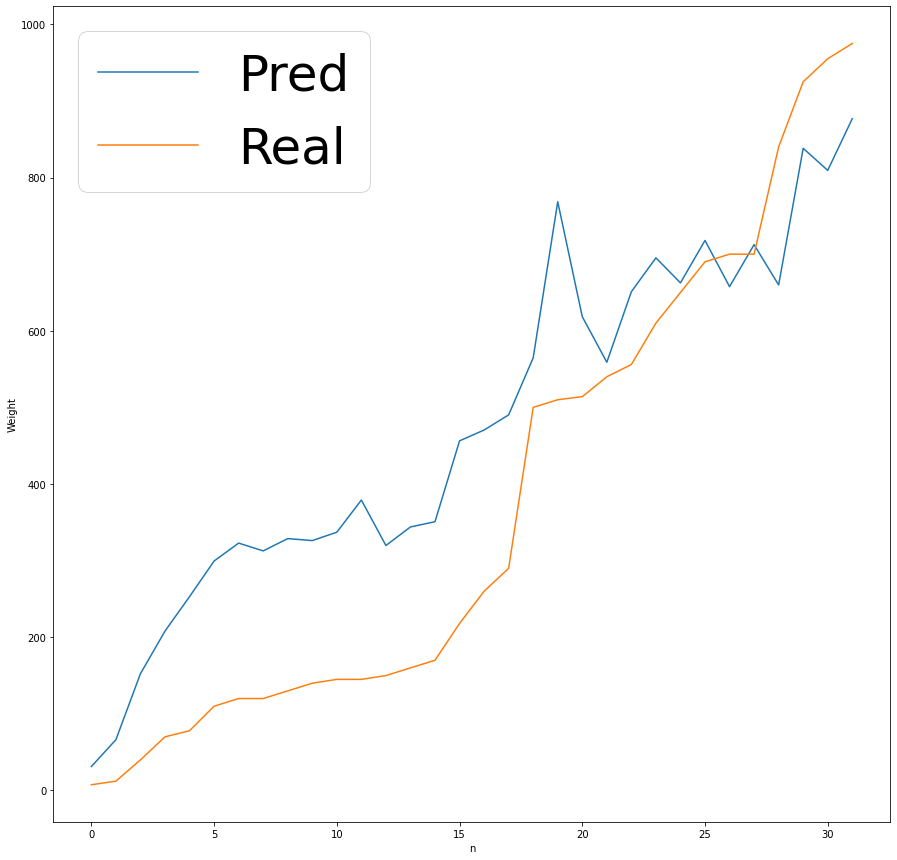

In [16]:
preds = model.predict(np.array(
    sorted_df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]))

plt.figure(figsize=(15, 15))
plt.plot(tf.math.multiply(preds, weightMax), label='Pred')
plt.plot(np.array(sorted_df['Weight']) * weightMax, label='Real')
plt.xlabel('n')
plt.ylabel('Weight')
plt.legend(loc='upper left', prop={'size': 50})

One of many ways to do Linear Regression. I'll probably get around to more lower level examples eventually.